In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [2]:
device = torch.device("cuda")

In [3]:
mnist_train = torchvision.datasets.MNIST(root='~/test/Datasets/MNIST',train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='~/test/Datasets/MNIST',train=False, download=True, transform=transforms.ToTensor())

In [4]:
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,shuffle=True, num_workers=2)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,shuffle=False, num_workers=2)

In [5]:
num_inputs,num_hiddens,num_outputs = 784,256,10

In [6]:
drop_prob1 = 0.2
drop_prob2 = 0.4
drop_prob3 = 0.6
drop_prob4 = 0.8

In [31]:
class ForwardNetWithDrop(nn.Module):
    def __init__(self):
        super(ForwardNetWithDrop,self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(num_inputs,num_hiddens)
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(drop_prob4)
        self.linear2 = nn.Linear(num_hiddens,num_outputs)
        
    def forward(self,x):
        y = self.flatten(x)
        y = self.linear1(y)
        y = self.relu(y)
        y = self.drop(y)
        y = self.linear2(y)
        return y

In [32]:
net = ForwardNetWithDrop()
net.to(device)

ForwardNetWithDrop(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (relu): ReLU()
  (drop): Dropout(p=0.8, inplace=False)
  (linear2): Linear(in_features=256, out_features=10, bias=True)
)

In [33]:
for params in net.parameters():
    nn.init.normal_(params,mean=0,std=0.01)

In [34]:
def evaluate_accuracy(data_iter,net,loss):
    acc_sum,n=0.0,0
    test_l_sum=0.0
    for X,y in data_iter:
        X = X.to(device)
        y = y.to(device)
        net.eval()
        acc_sum+=(net(X).argmax(dim=1)==y).float().sum().item()
        l=loss(net(X),y).sum()
        test_l_sum+=l.item()
        net.train()
        n+=y.shape[0]
    return acc_sum/n,test_l_sum/n

In [35]:
num_epochs=50
lr=0.01
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(net.parameters(),lr)

In [36]:
def train(net,train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,optimizer=None):
    train_loss=[]
    test_loss=[]
    for epoch in range(num_epochs):
        train_l_sum,train_acc_sum,n=0.0,0.0,0
        for X,y in train_iter:
            X = X.to(device)
            y = y.to(device)
            y_hat = net(X)
            l=loss(y_hat,y).sum()
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            l.backward()
            if optimizer is None:
                SGD(params,lr)
            else:
                optimizer.step()
            train_l_sum+=l.item()
            train_acc_sum+=(y_hat.argmax(dim=1)==y).sum().item()
            n+=y.shape[0]
        test_acc,test_l = evaluate_accuracy(test_iter,net,loss)
        train_loss.append(train_l_sum/n)
        test_loss.append(test_l)
        print('epoch%d,loss%.4f,train acc %3f,test acc %.3f'%(epoch+1,train_l_sum/n,train_acc_sum/n,test_acc))
    return train_loss,test_loss

In [37]:
train_loss,test_loss=train(net,train_iter,test_iter,loss,num_epochs,batch_size,net.parameters(),lr,optimizer)

epoch1,loss0.0089,train acc 0.306283,test acc 0.614
epoch2,loss0.0081,train acc 0.480583,test acc 0.689
epoch3,loss0.0065,train acc 0.577083,test acc 0.762
epoch4,loss0.0050,train acc 0.645467,test acc 0.806
epoch5,loss0.0041,train acc 0.694150,test acc 0.828
epoch6,loss0.0036,train acc 0.728550,test acc 0.847
epoch7,loss0.0033,train acc 0.753083,test acc 0.858
epoch8,loss0.0030,train acc 0.773533,test acc 0.869
epoch9,loss0.0028,train acc 0.789733,test acc 0.876
epoch10,loss0.0027,train acc 0.802983,test acc 0.882
epoch11,loss0.0025,train acc 0.812583,test acc 0.888
epoch12,loss0.0024,train acc 0.821250,test acc 0.890
epoch13,loss0.0024,train acc 0.826350,test acc 0.893
epoch14,loss0.0023,train acc 0.833583,test acc 0.895
epoch15,loss0.0022,train acc 0.841083,test acc 0.897
epoch16,loss0.0022,train acc 0.843600,test acc 0.900
epoch17,loss0.0021,train acc 0.846617,test acc 0.901
epoch18,loss0.0020,train acc 0.853333,test acc 0.905
epoch19,loss0.0020,train acc 0.855400,test acc 0.907
ep

In [ ]:
#stop

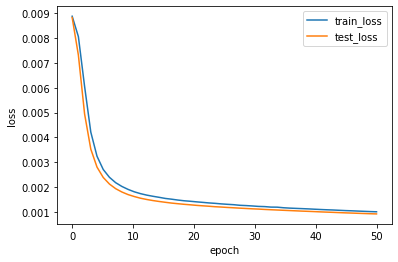

In [14]:
# dropout p=0.2
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label='train_loss',linewidth=1.5)
plt.plot(x,test_loss,label='test_loss',linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

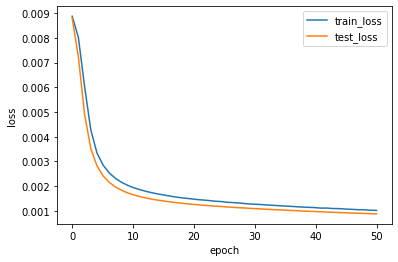

In [22]:
# dropout p=0.4
x=np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label='train_loss',linewidth=1.5)
plt.plot(x,test_loss,label='test_loss',linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

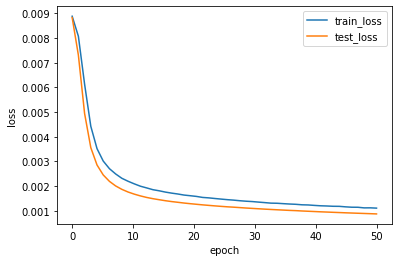

In [30]:
# dropout p=0.6
x=np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label='train_loss',linewidth=1.5)
plt.plot(x,test_loss,label='test_loss',linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

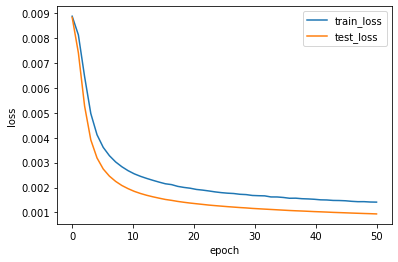

In [38]:
# dropout p=0.8
x=np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label='train_loss',linewidth=1.5)
plt.plot(x,test_loss,label='test_loss',linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()